<a href="https://colab.research.google.com/github/jwanajri/Janhvi-Wanjari/blob/main/Zomato_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data entry and Data pre-processing






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the .csv file

In [2]:
df=pd.read_excel("/content/zomato.xlsm")

In [ ]:
df

In [ ]:
df.head(2)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
df.shape

(9551, 21)

In [ ]:
df.shape

(9551, 21)

In [ ]:
df.info

<bound method DataFrame.info of       Restaurant ID           Restaurant Name  ...  Rating text Votes
0           6317637          Le Petit Souffle  ...    Excellent   314
1           6304287          Izakaya Kikufuji  ...    Excellent   591
2           6300002    Heat - Edsa Shangri-La  ...    Very Good   270
3           6318506                      Ooma  ...    Excellent   365
4           6314302               Sambo Kojin  ...    Excellent   229
...             ...                       ...  ...          ...   ...
9546        5915730              Naml€± Gurme  ...    Very Good   788
9547        5908749             Ceviz A€Ùac€±  ...    Very Good  1034
9548        5915807                     Huqqa  ...         Good   661
9549        5916112              AÅÙÅÙk Kahve  ...    Very Good   901
9550        5927402  Walter's Coffee Roastery  ...    Very Good   591

[9551 rows x 21 columns]>

In [ ]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [ ]:
display(df.dtypes.value_counts())

object     13
int64       5
float64     3
dtype: int64

In [ ]:
df.dtypes == 'object'

Restaurant ID           False
Restaurant Name          True
Country Code            False
City                     True
Address                  True
Locality                 True
Locality Verbose         True
Longitude               False
Latitude                False
Cuisines                 True
Average Cost for two    False
Currency                 True
Has Table booking        True
Has Online delivery      True
Is delivering now        True
Switch to order menu     True
Price range             False
Aggregate rating        False
Rating color             True
Rating text              True
Votes                   False
dtype: bool


separate numerical and categorical data

In [ ]:
num_vars = df.columns[df.dtypes !='object']
cat_vars = df.columns[df.dtypes =='object']
print(num_vars)
print(cat_vars)

Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')
Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')


In [ ]:
df[num_vars]

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
0,6317637,162,121.027535,14.565443,1100,3,4.8,314
1,6304287,162,121.014101,14.553708,1200,3,4.5,591
2,6300002,162,121.056831,14.581404,4000,4,4.4,270
3,6318506,162,121.056475,14.585318,1500,4,4.9,365
4,6314302,162,121.057508,14.584450,1500,4,4.8,229
...,...,...,...,...,...,...,...,...
9546,5915730,208,28.977392,41.022793,80,3,4.1,788
9547,5908749,208,29.041297,41.009847,105,3,4.2,1034
9548,5915807,208,29.034640,41.055817,170,4,3.7,661
9549,5916112,208,29.036019,41.057979,120,4,4.0,901


In [ ]:
df[num_vars].isnull()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
9546,False,False,False,False,False,False,False,False
9547,False,False,False,False,False,False,False,False
9548,False,False,False,False,False,False,False,False
9549,False,False,False,False,False,False,False,False


In [ ]:
df[num_vars].isnull().sum()

Restaurant ID           0
Country Code            0
Longitude               0
Latitude                0
Average Cost for two    0
Price range             0
Aggregate rating        0
Votes                   0
dtype: int64

In [ ]:
df[num_vars].isnull().sum().sort_values(ascending=False)

Votes                   0
Aggregate rating        0
Price range             0
Average Cost for two    0
Latitude                0
Longitude               0
Country Code            0
Restaurant ID           0
dtype: int64

In [ ]:
len(df)

9551

In [ ]:
df[num_vars].isnull().sum().sort_values(ascending=False)/len(df)

Votes                   0.0
Aggregate rating        0.0
Price range             0.0
Average Cost for two    0.0
Latitude                0.0
Longitude               0.0
Country Code            0.0
Restaurant ID           0.0
dtype: float64

# Now we will make some visualizations to get a better understanding of our data.
# EDA of the data set

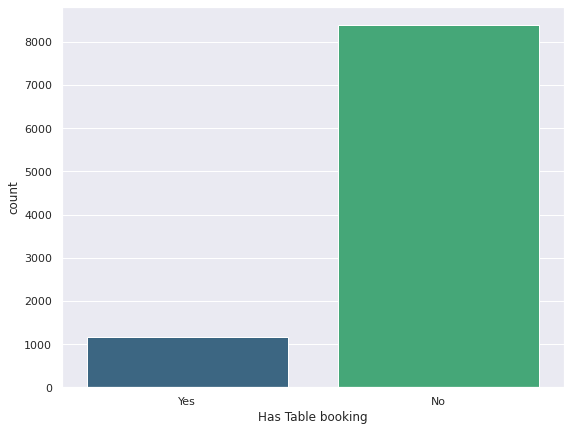

In [ ]:
sns.set(rc={'figure.figsize':(9,7)})
sns.countplot(x='Has Table booking',data=df,palette='viridis')

Interpretation :-
We can see that most of the tables havn't been booked.

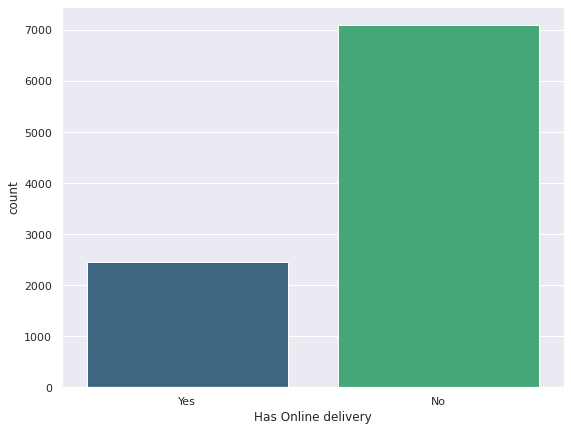

In [ ]:
sns.countplot(x='Has Online delivery',data=df,palette='viridis',order=['Yes','No'])

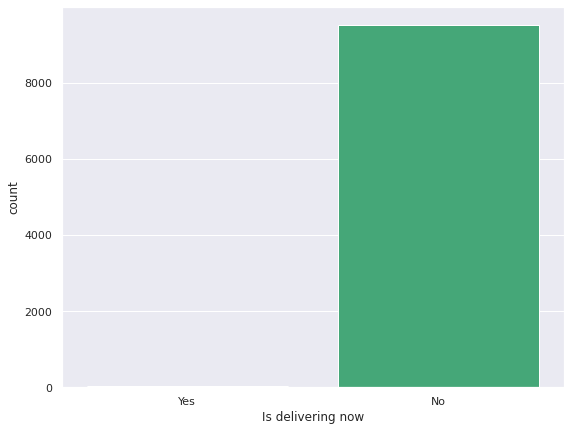

In [ ]:
sns.countplot(x='Is delivering now',data=df,palette='viridis',order=['Yes','No'])

Interpretation :- With this plot, it seems that there are no deliveries. Let's take a look at the numbers.

In [ ]:
df['Is delivering now'].value_counts()

No     9517
Yes      34
Name: Is delivering now, dtype: int64

We can see that there are only 34 restaurants who make deliveries. Because of this imbalance in the data, we will not use this feature.

In [ ]:
df['Switch to order menu'].value_counts()

No    9551
Name: Switch to order menu, dtype: int64

Interpretation :- In this column there is only one option, so we will not use this column also


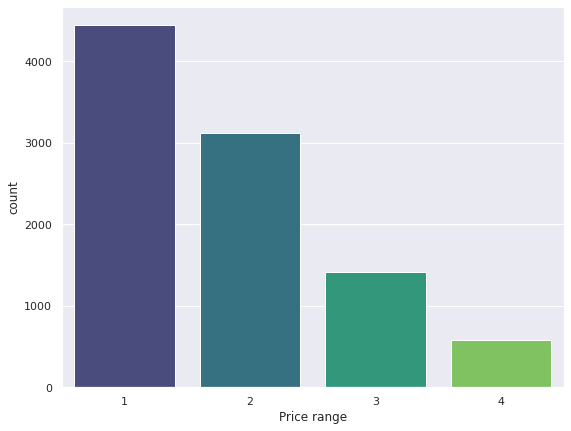

In [ ]:
sns.countplot(x='Price range',data=df,palette='viridis')

We can see that from all the price category, the low price category has most of the restaurants.

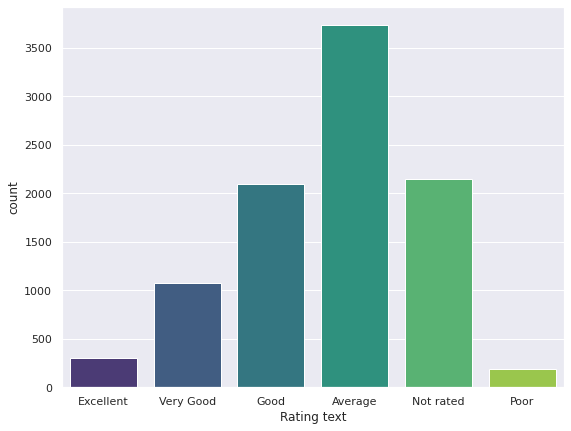

In [ ]:
sns.countplot(x='Rating text',data=df,palette='viridis')

Interpretation :- We can see that in this column the data is in a normal distribution.

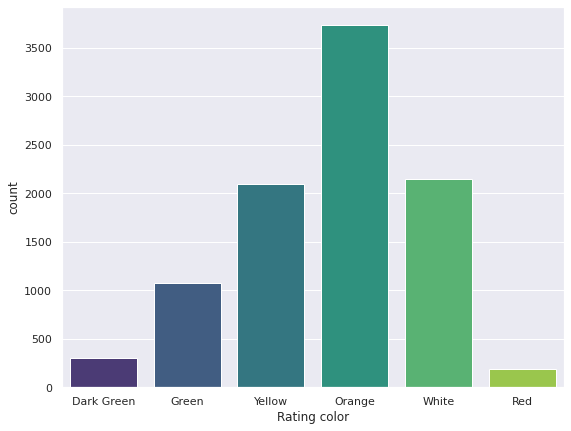

In [ ]:
sns.countplot(x='Rating color',data=df,palette='viridis')

Interpretation :- It looks like this data here is just the same as the 'Rating text', so we will use the Rating text column.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


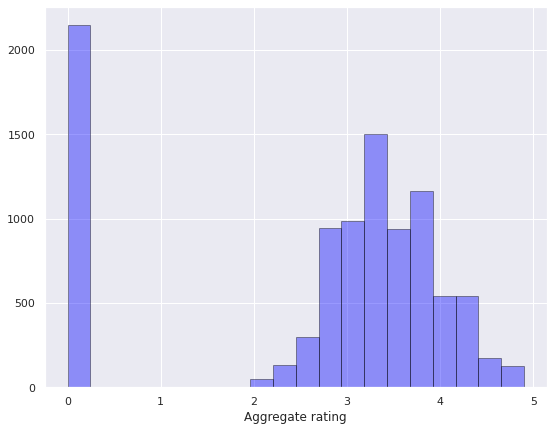

In [ ]:
sns.distplot(df['Aggregate rating'], hist=True,kde=False,bins=20,color = 'blue',hist_kws={'edgecolor':'black'})

We can see that most of the data is distributed in a normal distribution, but there are also restaurants who got a rating of 0.

# Now, we will do some feature engineering and try to get more from our dataset.

# First, we have to change the cost column. Let's look at how many currencies we have.

In [3]:
df['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(å£)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [4]:
df['new cost'] = 0

In [5]:
df['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(å£)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [6]:
d = {'Botswana Pula(P)':0.095, 'Brazilian Real(R$)':0.266,'Dollar($)':1,'Emirati Diram(AED)':0.272,
    'Indian Rupees(Rs.)':0.014,'Indonesian Rupiah(IDR)':0.00007,'NewZealand($)':0.688,'Pounds(\x8c£)':1.314,
    'Qatari Rial(QR)':0.274,'Rand(R)':0.072,'Sri Lankan Rupee(LKR)':0.0055,'Turkish Lira(TL)':0.188}

df['new cost'] = df['Average Cost for two'] * df['Currency'].map(d) 

#convertion of the currencies in one unit


In [7]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,new cost
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,104.5
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,114.0


# Heat Map and Correlation 

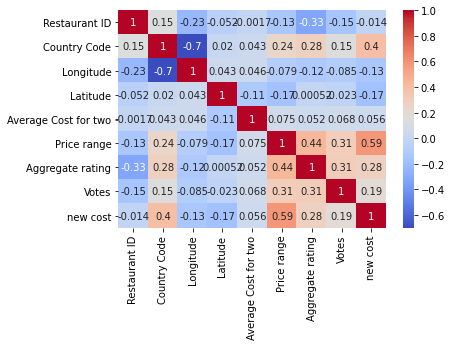

In [8]:
## heat map
sns.heatmap(data=df.corr(),cmap='coolwarm',annot=True)

##We can see that the 'price range', 'votes' and the 'new cost' correlated with our target, so we will use them in our model.

##Now we will try to do some Exploratory data analysis in order to get a better understanding of the connection between our features, and between the features and the target.

##We will first add new feature from our target to understand it better.

In [9]:
df['new Rating'] = 0

In [10]:
mask1 = (df['Aggregate rating'] < 1)
mask2 = (df['Aggregate rating'] >= 1) & (df['Aggregate rating'] < 2)
mask3 = (df['Aggregate rating'] >= 2) &(df['Aggregate rating'] < 3)
mask4 = (df['Aggregate rating'] >= 3) & (df['Aggregate rating'] < 4)
mask5 = (df['Aggregate rating'] >= 4)

df['new Rating'] = df['new Rating'].mask(mask1, 'Low')
df['new Rating'] = df['new Rating'].mask(mask2, 'Medium -')
df['new Rating'] = df['new Rating'].mask(mask3, 'Medium')
df['new Rating'] = df['new Rating'].mask(mask4, 'Medium +')
df['new Rating'] = df['new Rating'].mask(mask5, 'High')

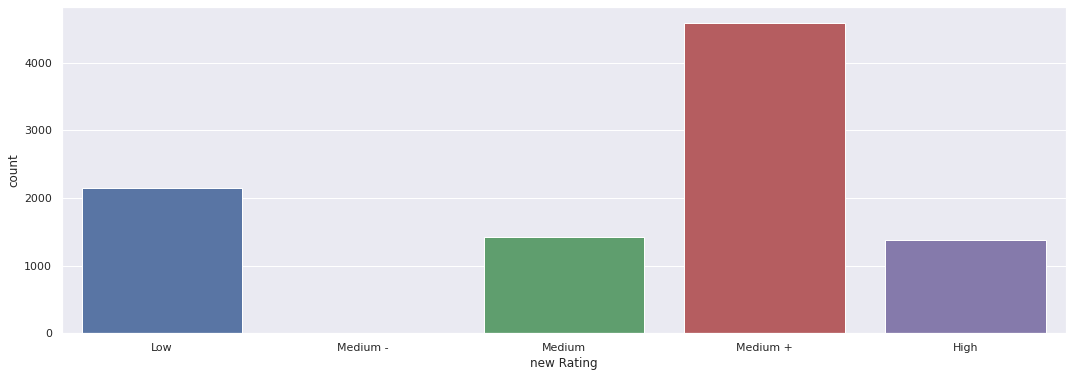

In [11]:
sns.set(rc={'figure.figsize':(18,6)})
sns.countplot(data=df,x='new Rating',order=['Low','Medium -','Medium','Medium +','High'])

We can see that most of the restaurants have aggregate rating between 3 to 4

(1.0, 5.0)

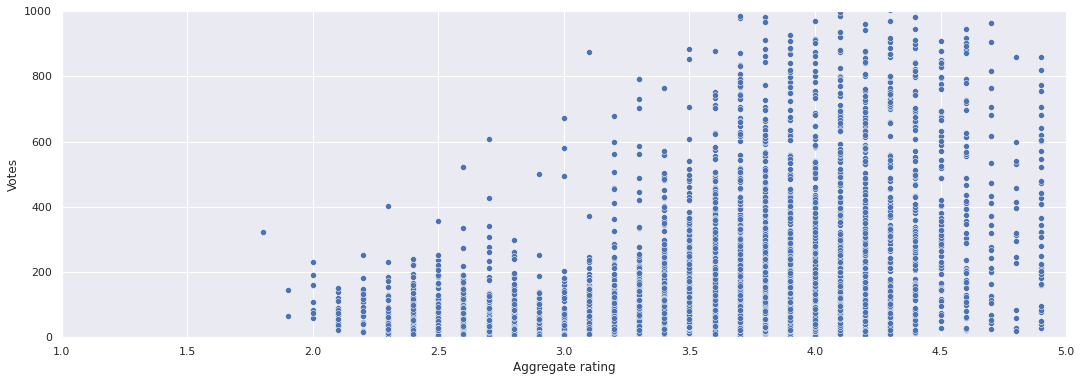

In [12]:
sns.set(rc={'figure.figsize':(18,6)})
sns.scatterplot(data=df,x='Aggregate rating',y='Votes')
plt.ylim(0,1000)
plt.xlim(1,5)

We can see correlation between the number of votes and the aggregate rating, but we can see that it isn't strong.


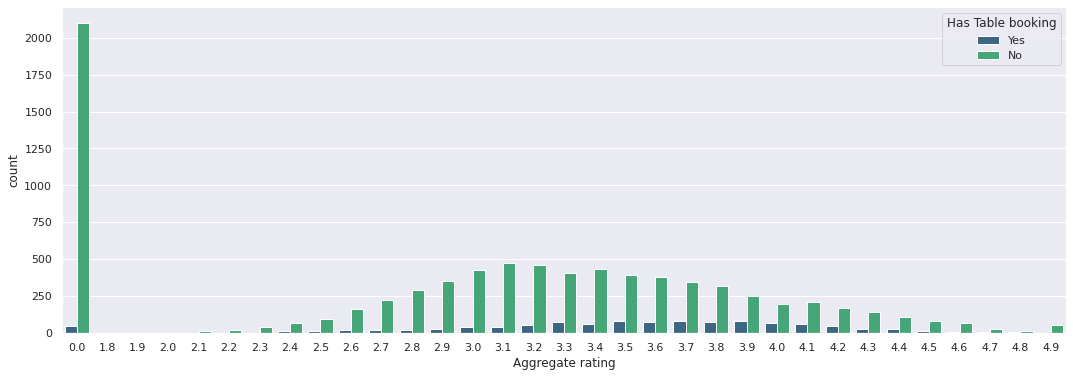

In [13]:
sns.countplot(data=df,x='Aggregate rating',hue='Has Table booking',palette='viridis')

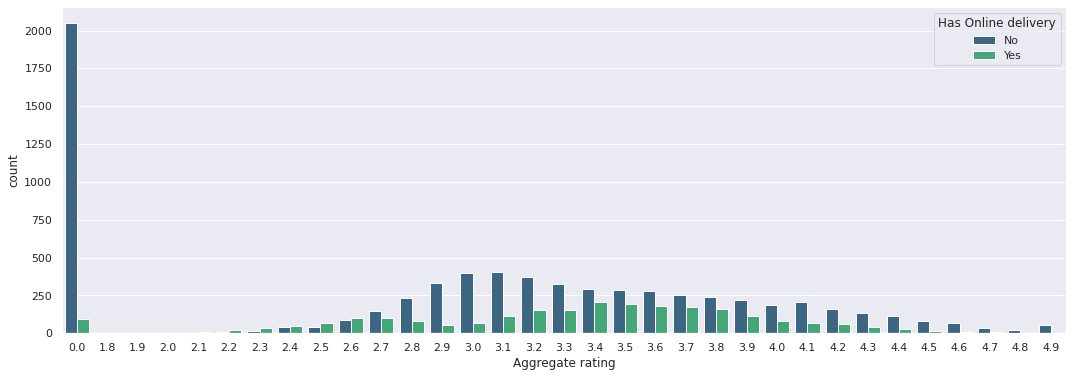

In [14]:
sns.countplot(data=df,x='Aggregate rating',hue='Has Online delivery',palette='viridis')

We can see that there is a bigger correlation between the delivery feature than the table booking feature. But, we can see that both of them can help the model, so we will use them both.


In [15]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,new cost,new Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,104.5,High
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,114.0,High


##Now, after we deecided which columns we will use, we have to create subset from our dataset.

In [16]:
new_df = df[['Has Table booking','Has Online delivery','Price range','Rating text','Votes','new cost','Aggregate rating']]
new_df.head()

,Has Table booking,Has Online delivery,Price range,Rating text,Votes,new cost,Aggregate rating
0,Yes,No,3,Excellent,314,104.5,4.8
1,Yes,No,3,Excellent,591,114.0,4.5
2,Yes,No,4,Very Good,270,380.0,4.4
3,No,No,4,Excellent,365,142.5,4.9
4,Yes,No,4,Excellent,229,142.5,4.8


##We can see that we have some features that have to be encoded in order to fit the machine learning algorithms (the scikit-learn library can't get any text).

In [17]:
new_df = pd.get_dummies(new_df, columns=['Has Table booking','Has Online delivery','Price range','Rating text'])

In [18]:
new_df.head()

,Votes,new cost,Aggregate rating,Has Table booking_No,Has Table booking_Yes,Has Online delivery_No,Has Online delivery_Yes,Price range_1,Price range_2,Price range_3,Price range_4,Rating text_Average,Rating text_Excellent,Rating text_Good,Rating text_Not rated,Rating text_Poor,Rating text_Very Good
0,314,104.5,4.8,0,1,1,0,0,0,1,0,0,1,0,0,0,0
1,591,114.0,4.5,0,1,1,0,0,0,1,0,0,1,0,0,0,0
2,270,380.0,4.4,0,1,1,0,0,0,0,1,0,0,0,0,0,1
3,365,142.5,4.9,1,0,1,0,0,0,0,1,0,1,0,0,0,0
4,229,142.5,4.8,0,1,1,0,0,0,0,1,0,1,0,0,0,0


In [19]:
np.isnan(new_df).sum()

Votes                       0
new cost                   80
Aggregate rating            0
Has Table booking_No        0
Has Table booking_Yes       0
Has Online delivery_No      0
Has Online delivery_Yes     0
Price range_1               0
Price range_2               0
Price range_3               0
Price range_4               0
Rating text_Average         0
Rating text_Excellent       0
Rating text_Good            0
Rating text_Not rated       0
Rating text_Poor            0
Rating text_Very Good       0
dtype: int64

In [20]:
mean_value=new_df['new cost'].mean()
mean_value

11.096499630450825

In [21]:
new_df['new cost'].fillna(value=mean_value, inplace=True)

In [22]:
np.isnan(new_df).sum()

Votes                      0
new cost                   0
Aggregate rating           0
Has Table booking_No       0
Has Table booking_Yes      0
Has Online delivery_No     0
Has Online delivery_Yes    0
Price range_1              0
Price range_2              0
Price range_3              0
Price range_4              0
Rating text_Average        0
Rating text_Excellent      0
Rating text_Good           0
Rating text_Not rated      0
Rating text_Poor           0
Rating text_Very Good      0
dtype: int64

#Chi square test

In [51]:
ct=pd.crosstab(index=df['Has Online delivery'],columns=df['Price range']) 

In [52]:
ct

Price range,1,2,3,4
Has Online delivery,,,,
No,3743,1827,997,533
Yes,701,1286,411,53


In [53]:
ct.iloc[1].values

array([ 701, 1286,  411,   53])

In [54]:
from scipy import stats

In [55]:
(chi2, p, dof,_)=stats.chi2_contingency([ct.iloc[0].values,ct.iloc[1].values])

In [56]:
print('chi2 :',chi2)
print('p-value :',p)
print('degree of freedom :',dof)

chi2 : 721.3786767489617
p-value : 4.855491091732131e-156
degree of freedom : 3


In [57]:
pd.crosstab(index=df['Has Online delivery'],columns=['price range'],margins=True)

col_0,price range,All
Has Online delivery,,
No,7100,7100
Yes,2451,2451
All,9551,9551


In [58]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
print(r2_score(y_test,np.round(lr_pred,decimals=1))) 
print('RMSE score through Decision tree regression : ',np.sqrt(metrics.mean_squared_error(y_test,np.round(dt_pred,decimals=1))))

0.9857165736919926
RMSE score through Decision tree regression :  0.22905644011128565


## Multi Linear Regression.

In [59]:
X = new_df[['Votes','new cost','Has Table booking_No','Has Table booking_Yes','Has Online delivery_No','Has Online delivery_Yes','Price range_1','Price range_2','Price range_3','Price range_4','Rating text_Average','Rating text_Excellent','Rating text_Good','Rating text_Not rated','Rating text_Poor','Rating text_Very Good']]
y = new_df['Aggregate rating']

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [61]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:

lr = LinearRegression() # Defing the linear regression model 
lr.fit(X_train,y_train) #Fitting the data into the algorithm


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
lr_pred = lr.predict(X_test)
lr_pred

array([ 2.29789469e+00,  4.12040416e+00,  3.05456918e+00, ...,
        3.67323631e+00, -1.37250395e-03,  3.83720699e+00])

In [64]:

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [67]:
print(r2_score(y_test,np.round(lr_pred,decimals=1))) 
print('RMSE score through Linear regression : ',np.sqrt(metrics.mean_squared_error(y_test,np.round(lr_pred,decimals=1))))

0.9857165736919926
RMSE score through Linear regression :  0.17977849439838664


In [68]:
print(r2_score(y_test,np.round(lr_pred,decimals=1))) 

0.9857165736919926


#Stat Model


In [69]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
import statsmodels.api as sm
#Usings Statsmodel

x1 = sm.add_constant(X)
results = sm.OLS(y_train,X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Aggregate rating   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 3.999e+04
Date:                Thu, 13 May 2021   Prob (F-statistic):               0.00
Time:                        16:28:22   Log-Likelihood:                 2047.1
No. Observations:                6685   AIC:                            -4068.
Df Residuals:                    6672   BIC:                            -3980.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Votes                    3.499e-05   5.97e-06      5.858      0.000    2.33e-05    4.67e-05
new cost                    0.0004      0.000      2.323      0.020    6.37e-05       0.001
Has Table booking_No        1.0561      0.004    270.583      0.000       1.048       1.064
Has Table booking_Yes       1.0299      0.005    194.781      0.000       1.020       1.040
Has Online delivery_No      1.0510      0.003    327.003      0.000       1.045       1.057
Has Online delivery_Yes     1.0350      0.004    273.666      0.000       1.028       1.042
Price range_1               0.4974      0.005     94.833      0.000       0.487       0.508
Price range_2               0.5050      0.005    109.157      0.000       0.496       0.514
Price range_3               0.5375      0.005     99.450      0.000       0.527       0.548
Price range_4               0.5462      0.009     58.866      0.000       0.528       0.564
Rating text_Average         0.4380      0.005     92.610      0.000       0.429       0.447
Rating text_Excellent       1.9886      0.012    168.232      0.000       1.965       2.012
Rating text_Good            1.0602      0.005    206.414      0.000       1.050       1.070
Rating text_Not rated      -2.6076      0.006   -443.480      0.000      -2.619      -2.596
Rating text_Poor           -0.3105      0.014    -22.892      0.000      -0.337      -0.284
Rating text_Very Good       1.5173      0.007    224.617      0.000       1.504       1.531
==============================================================================
Omnibus:                      237.273   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.936
Skew:                          -0.395   Prob(JB):                     1.00e-66
Kurtosis:                       3.683   Cond. No.                     2.85e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.65e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#Decision Tree Regressor

In [72]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(X_train,y_train)
dtr_predictions = dtr.predict(X_test) 
results = model_selection.cross_val_score(dtr, X, y, scoring='r2')
print(results)
# R^2 Score
print("R_square score: ", r2_score(y_test,dtr_predictions))

[0.97047075 0.97166805 0.97651647 0.9758848  0.9792962 ]
R_square score:  0.9766063232595784
